In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


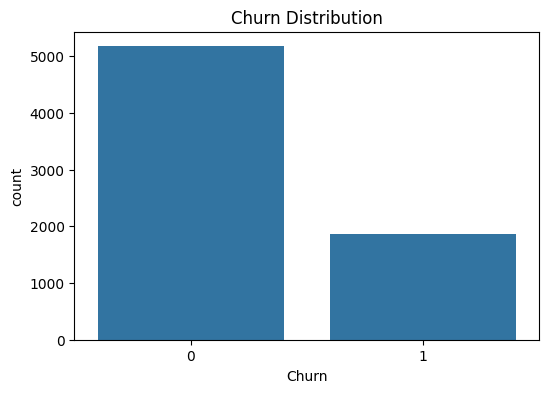

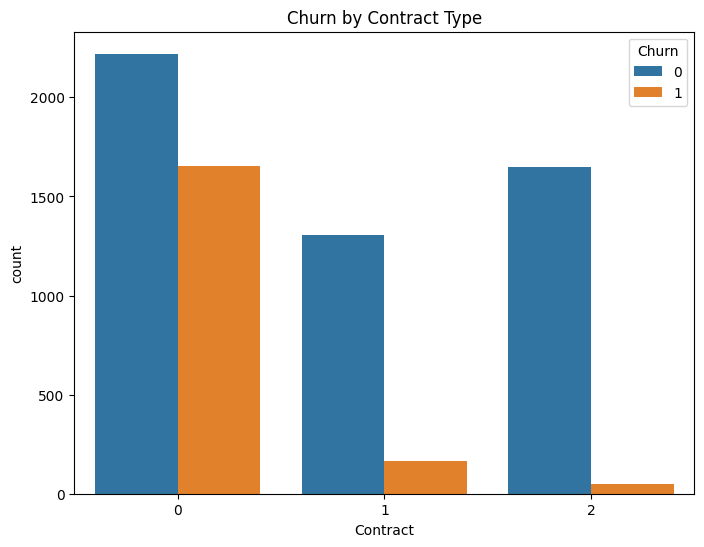

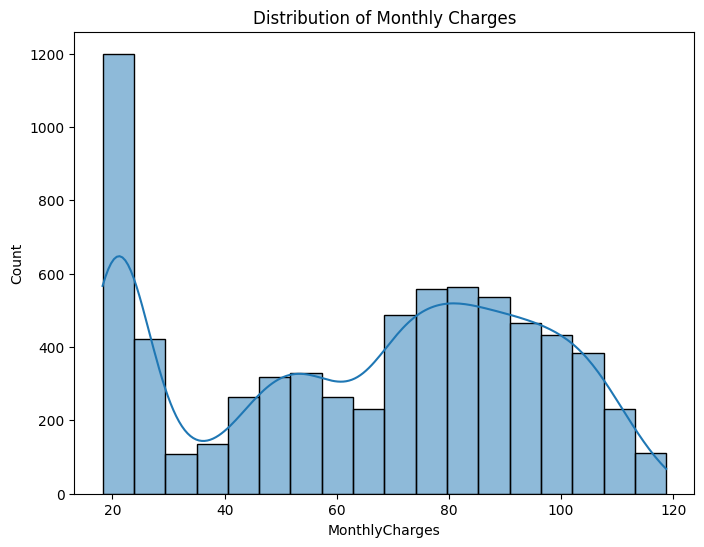

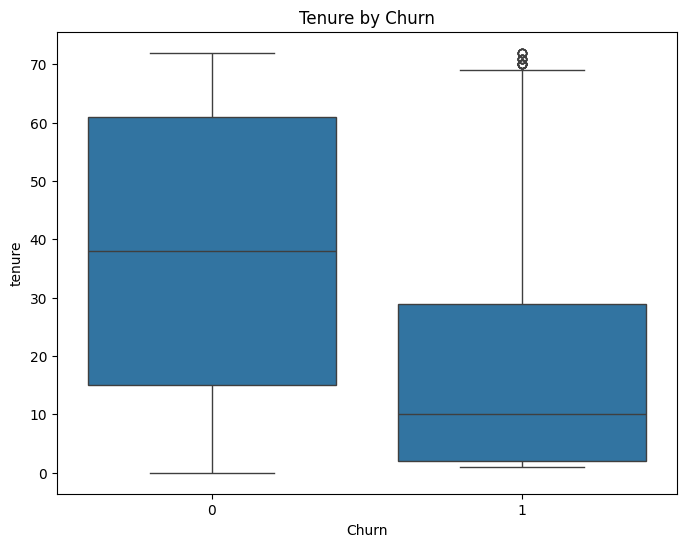

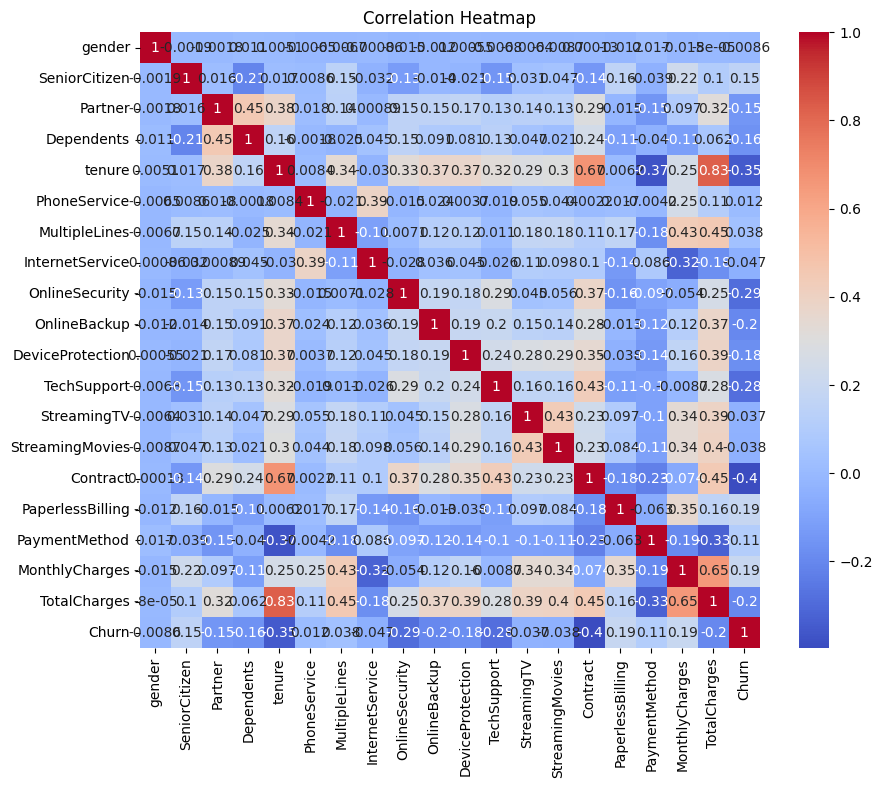

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.63      0.54      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



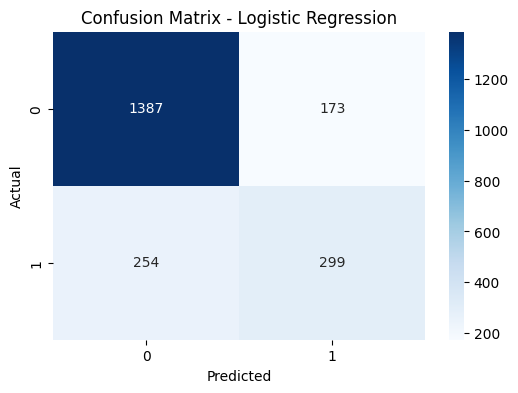

AUC Score: 0.8349167709927205


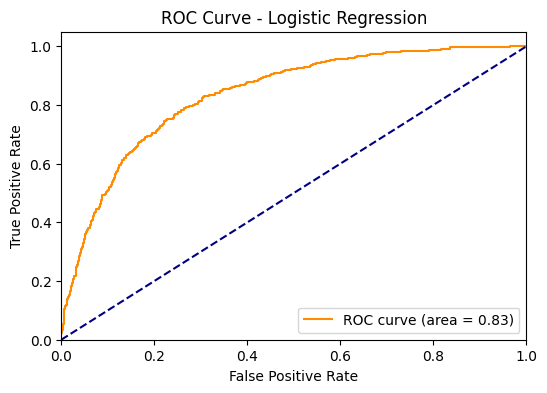

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.64      0.52      0.57       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



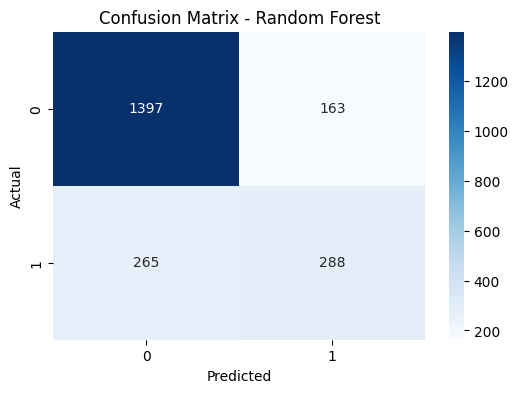

AUC Score: 0.824880025038253


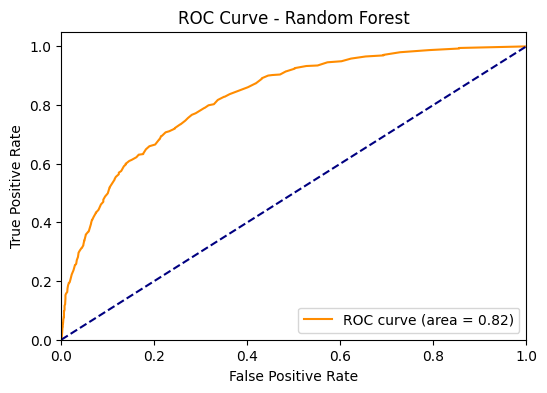

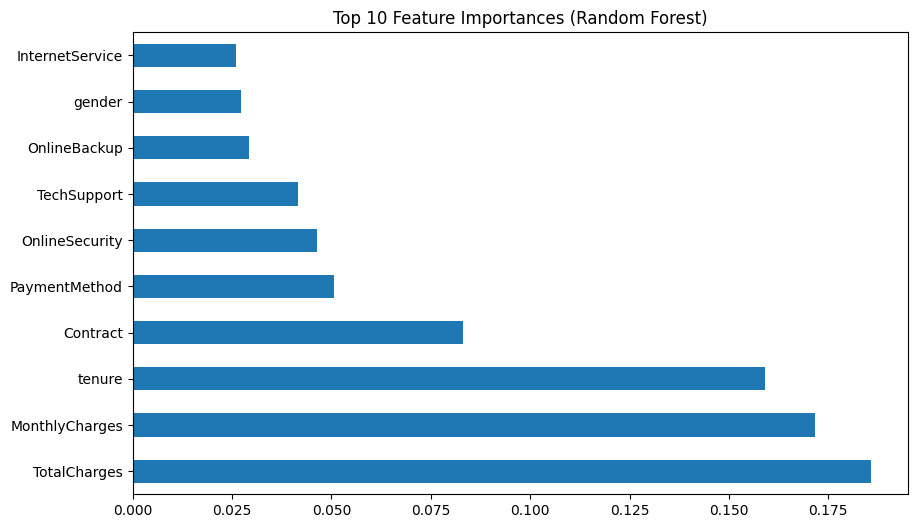

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Cleaning
df = df.drop('customerID', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)  # Fill missing values with 0

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=np.number).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Model Building and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"AUC Score: {roc_auc}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

    if name == 'Random Forest':
      plt.figure(figsize=(10, 6))
      feat_importances = pd.Series(model.feature_importances_, index=X.columns)
      feat_importances.nlargest(10).plot(kind='barh')
      plt.title('Top 10 Feature Importances (Random Forest)')
      plt.show()


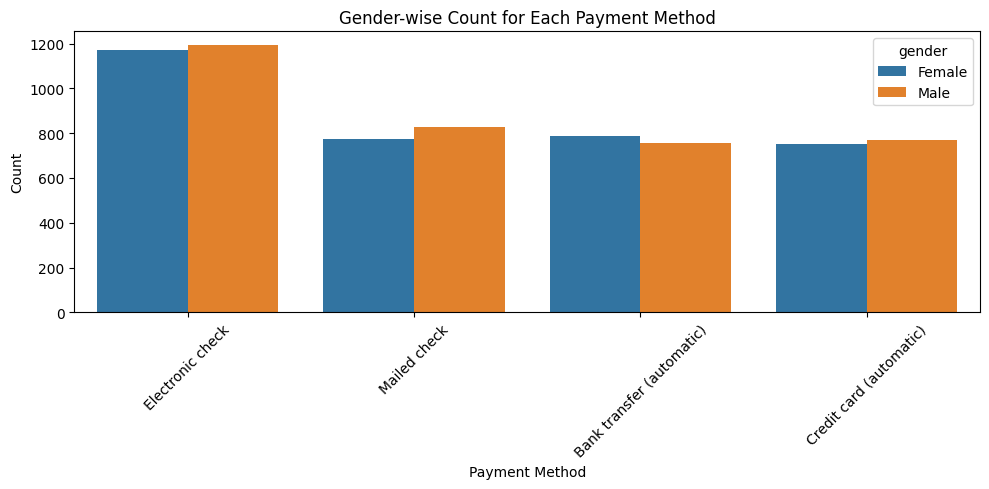

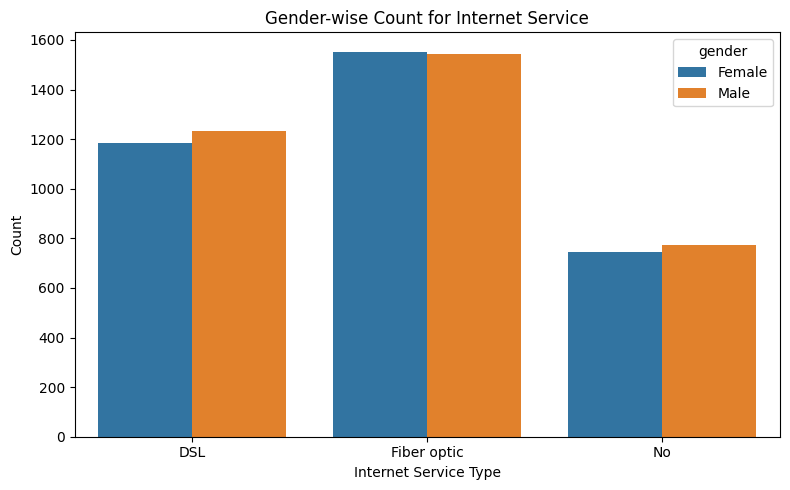

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Gender-wise count of Payment Method
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='gender')
plt.title('Gender-wise Count for Each Payment Method')
plt.xticks(rotation=45)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Gender-wise count of Internet Service
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='gender')
plt.title('Gender-wise Count for Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


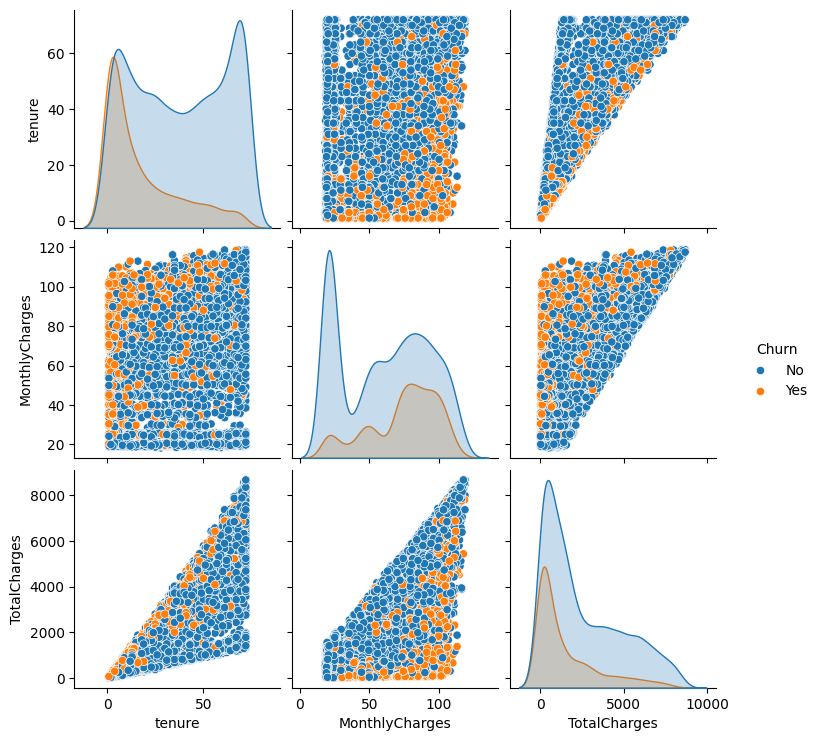

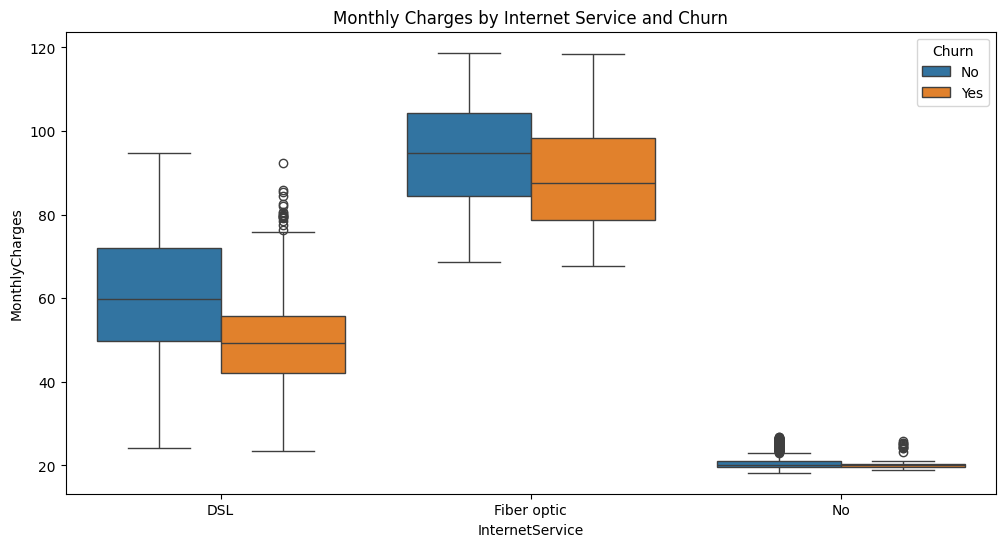

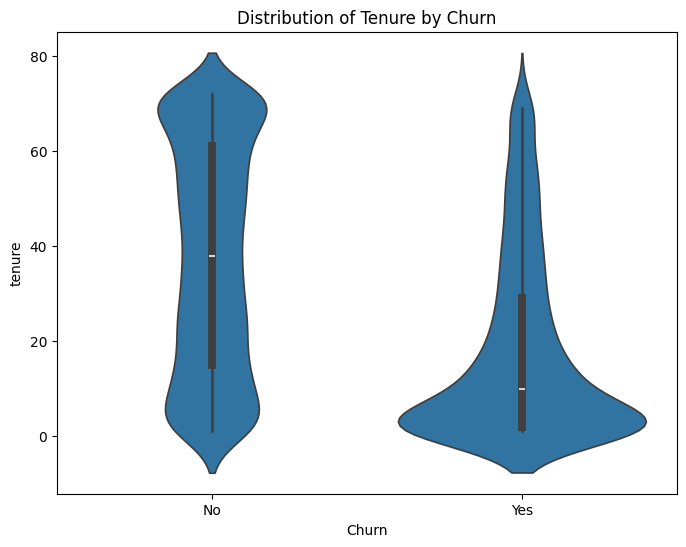

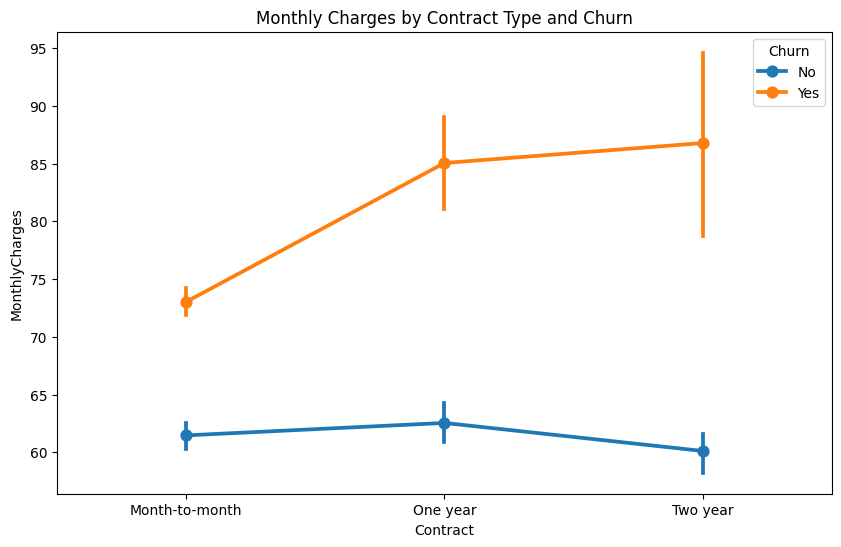

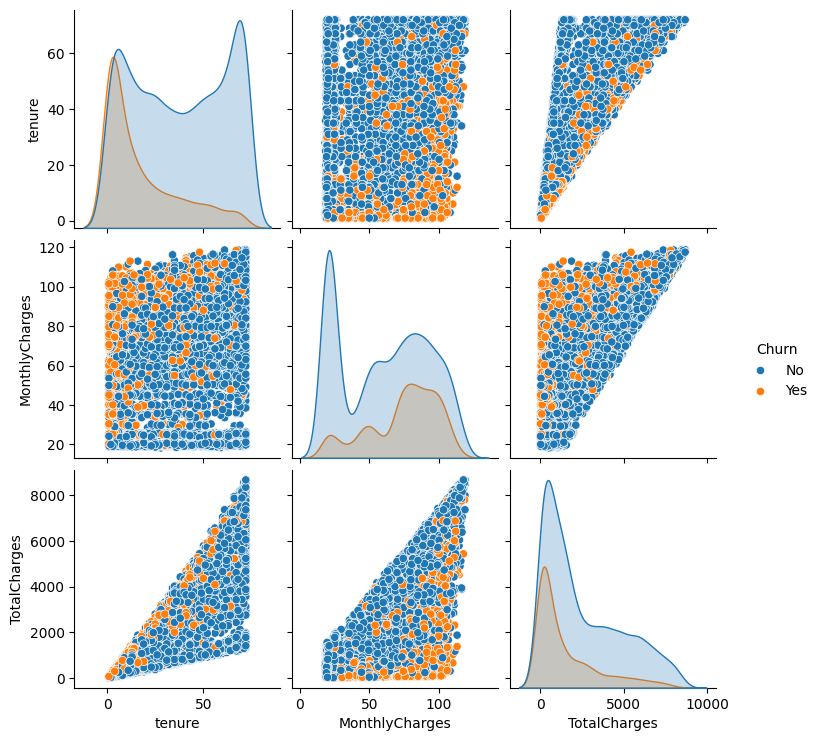

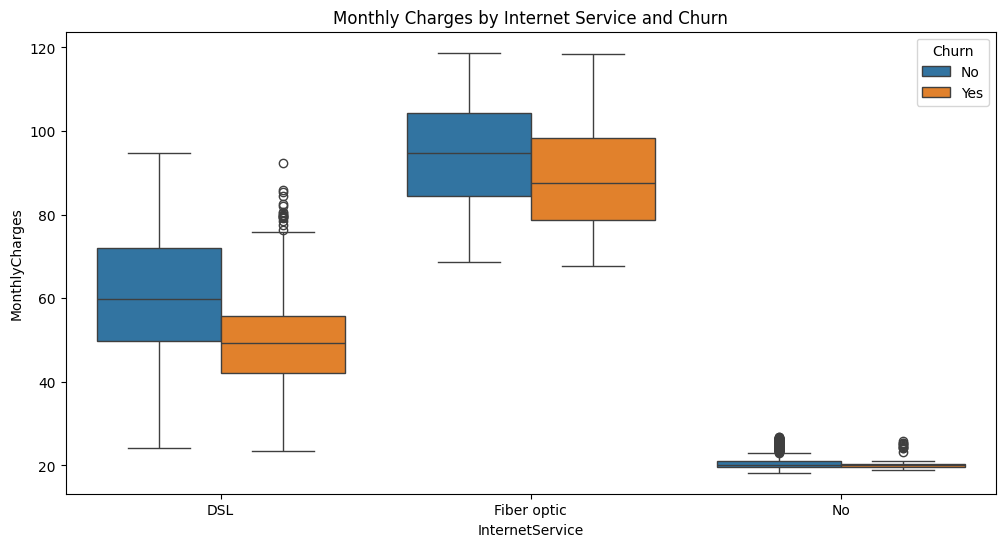

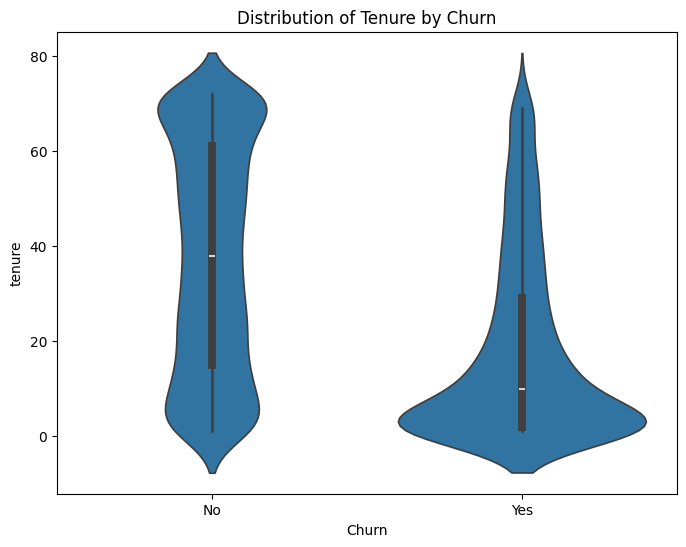

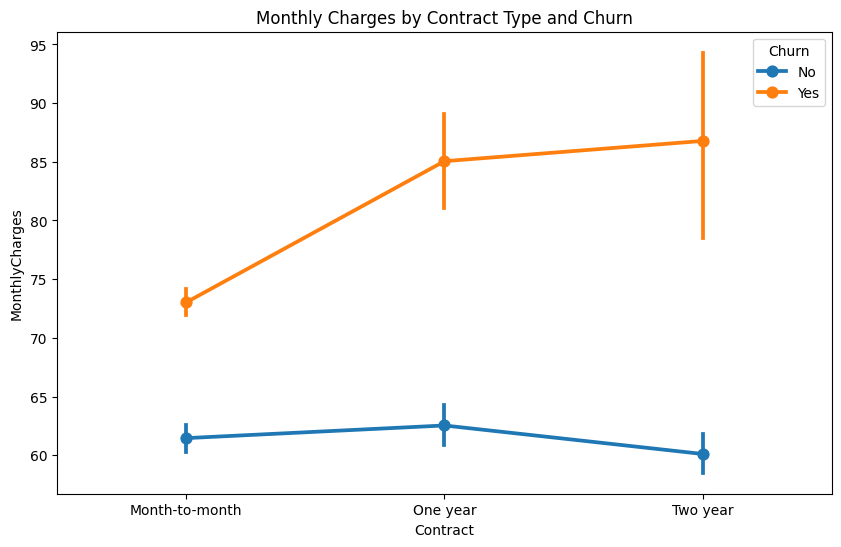

In [ ]:
import seaborn as sns # Importing seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Now you can list the directory contents
os.listdir('/content/drive/MyDrive/')

# prompt: i want few more uniwue graphs for the data
# ... rest of your code ...

# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Pairplot to visualize relationships between multiple features
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()


# Create a box plot for MonthlyCharges grouped by Churn and InternetService
plt.figure(figsize=(12, 6))
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Internet Service and Churn')
plt.show()

# Visualize the distribution of tenure for churned and non-churned customers using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='tenure', data=df)
plt.title('Distribution of Tenure by Churn')
plt.show()

# Analyze the relationship between Contract and MonthlyCharges with Churn using a pointplot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Pairplot to visualize relationships between multiple features
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()


# Create a box plot for MonthlyCharges grouped by Churn and InternetService
plt.figure(figsize=(12, 6))
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Internet Service and Churn')
plt.show()

# Visualize the distribution of tenure for churned and non-churned customers using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='tenure', data=df)
plt.title('Distribution of Tenure by Churn')
plt.show()

# Analyze the relationship between Contract and MonthlyCharges with Churn using a pointplot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()

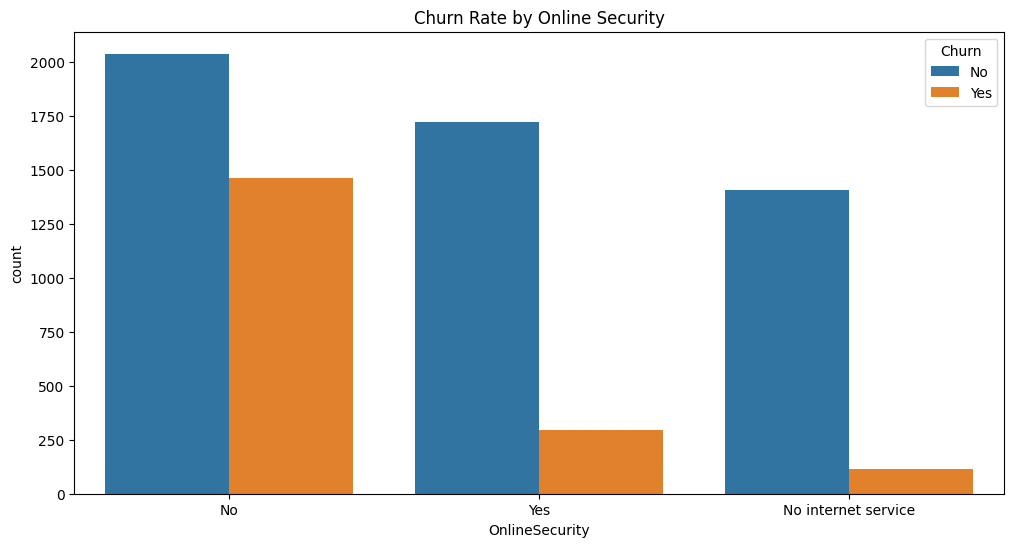

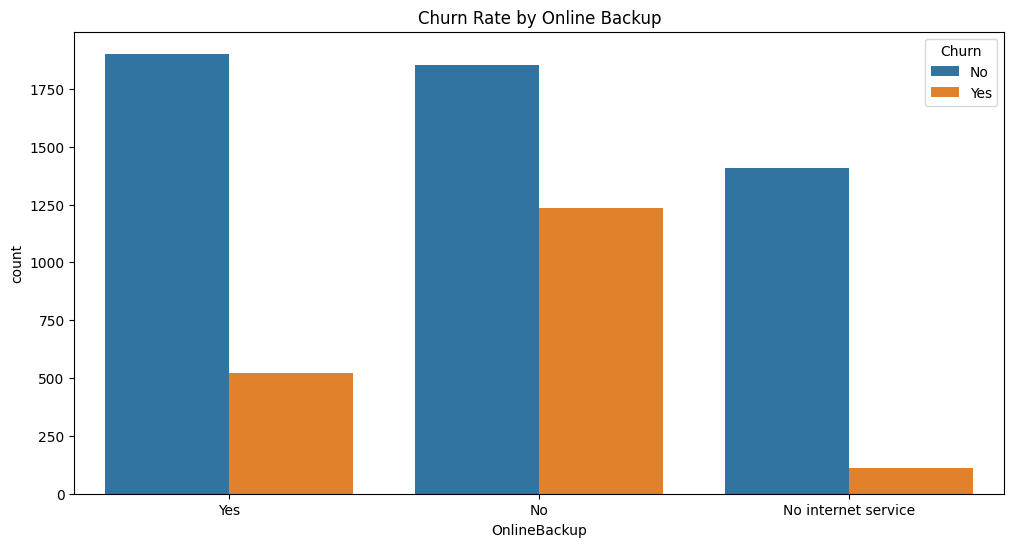

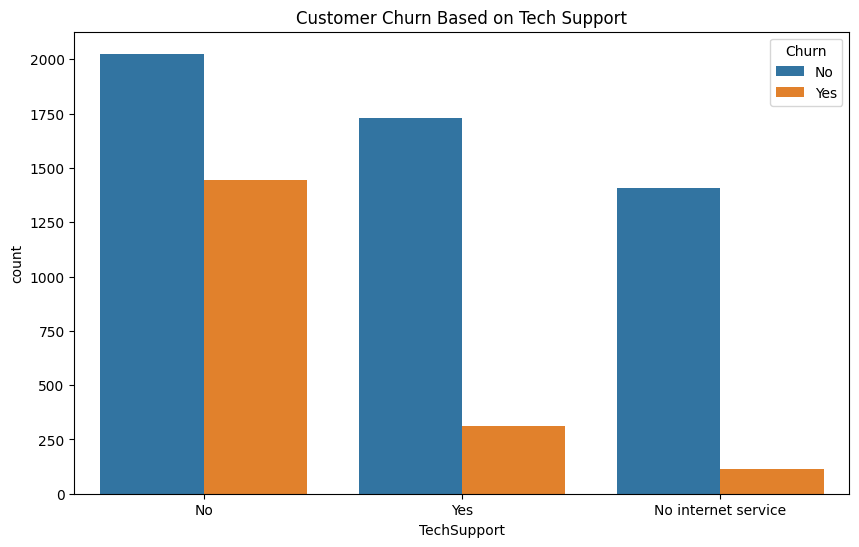

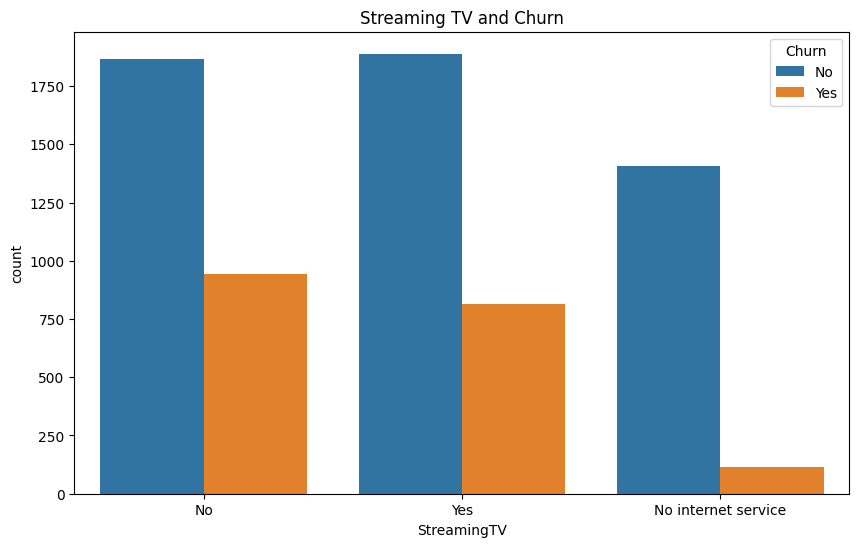

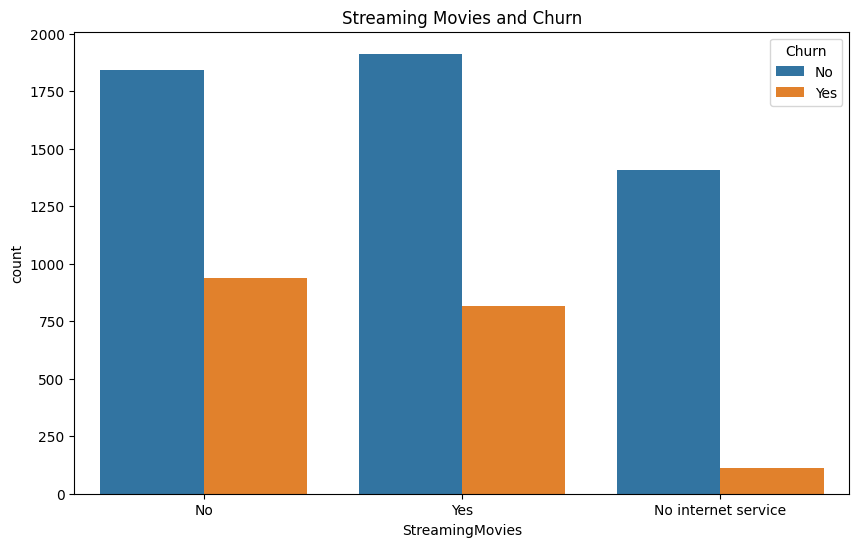

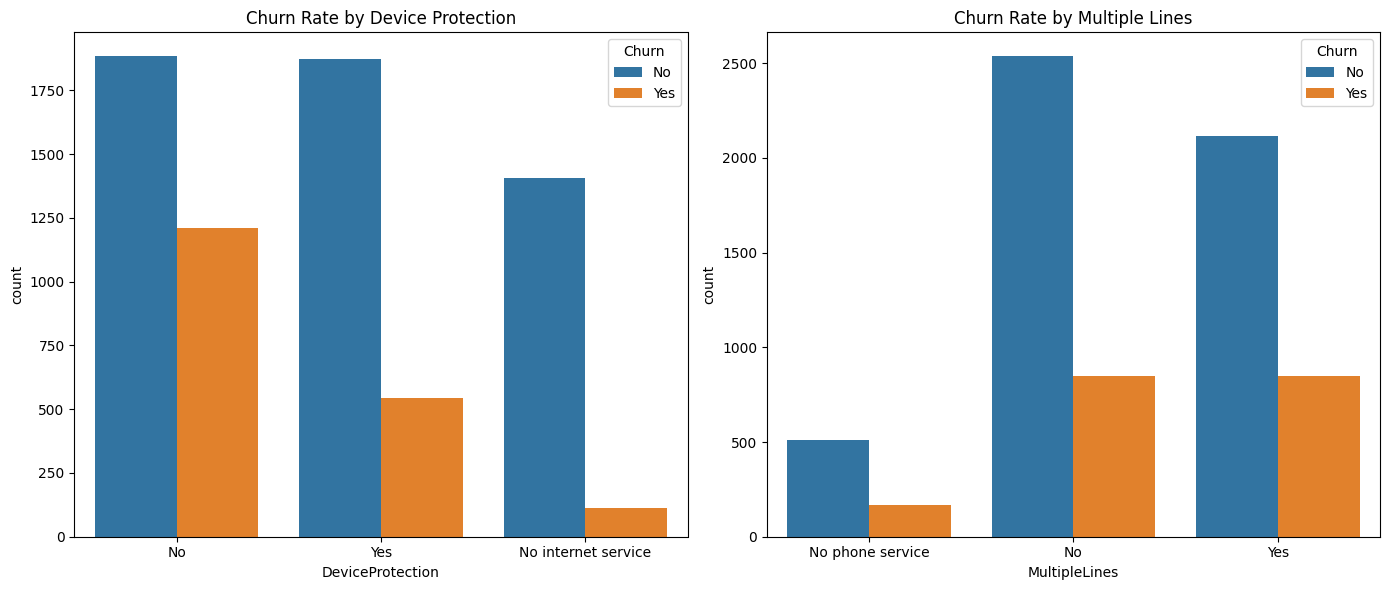

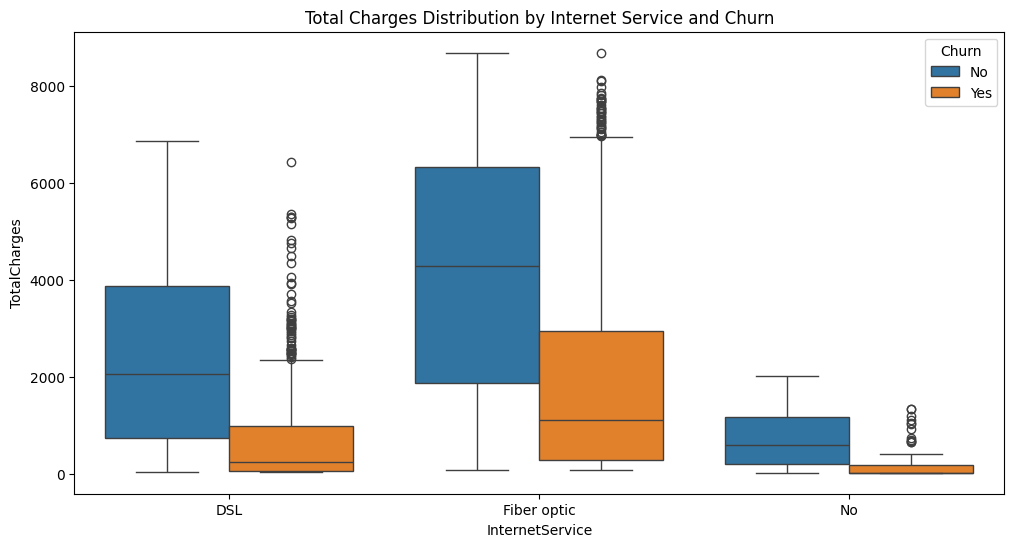

<ipython-input-10-5d16d502c883>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


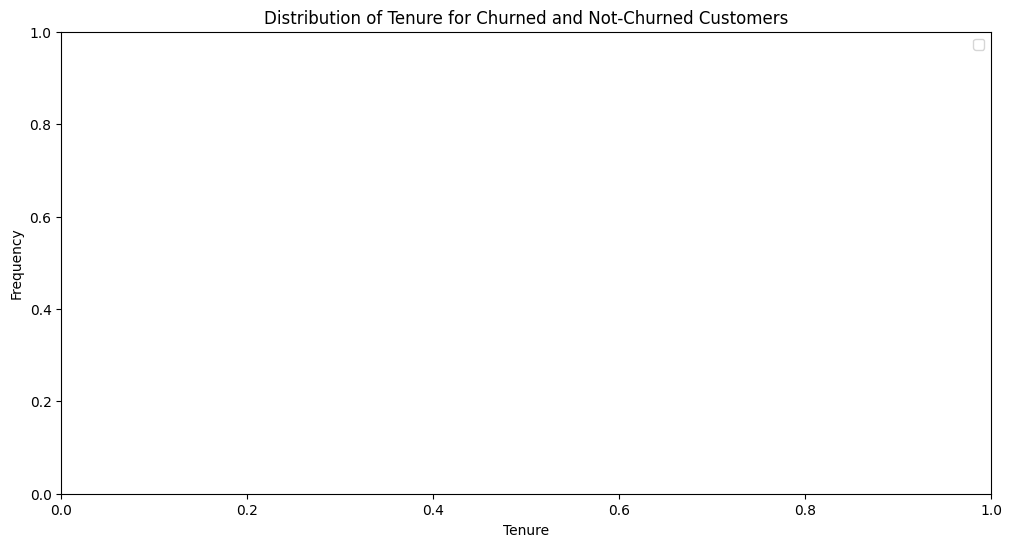

In [ ]:
# prompt: need few more unique insgihts

# ... (Your existing code)

# Analyze the relationship between different services and churn
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn Rate by Online Security')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('Churn Rate by Online Backup')
plt.show()


# Customer churn based on tech support
plt.figure(figsize=(10, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Customer Churn Based on Tech Support")
plt.show()

#Streaming TV and Movies impact on churn
plt.figure(figsize=(10,6))
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Streaming TV and Churn')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title('Streaming Movies and Churn')
plt.show()


# Create a combined plot for better visualization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Churn Rate by Device Protection')

plt.subplot(1, 2, 2)
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn Rate by Multiple Lines')

plt.tight_layout()
plt.show()


# Grouped Box Plots for deeper insights
plt.figure(figsize=(12, 6))
sns.boxplot(x="InternetService", y="TotalCharges", hue="Churn", data=df)
plt.title("Total Charges Distribution by Internet Service and Churn")
plt.show()

#Additional analysis for tenure
plt.figure(figsize=(12,6))
sns.histplot(df[df['Churn']==0]['tenure'], label="Not Churned", kde=True, color='g')
sns.histplot(df[df['Churn']==1]['tenure'], label='Churned', kde=True, color='r')
plt.legend()
plt.title('Distribution of Tenure for Churned and Not-Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()
